### **Mobile Robot**

Packages used:
<span style="color:yellow; background-color:green"> LinearAlgebra, Plots, LaTeXStrings, QuadGK </span>

In [1]:
using LinearAlgebra, Plots, LaTeXStrings, QuadGK

**Helper functions:**
1. $v(t)$
2. $integral\_t(f, t_0, t)$

In [2]:
# Speed profile
function v(t)
    if t < 2
        v = 1
    elseif t < 4
        v = 1 + 2 * (t - 2)
    else
        v = 5 - 1.25 * (t - 4)
    end
    return v
end

# How to integrate a generic function f from t0 to t
function integral_t(f, t0, t)
    result, err = quadgk(f, t0, t)
    return result
end


integral_t (generic function with 1 method)

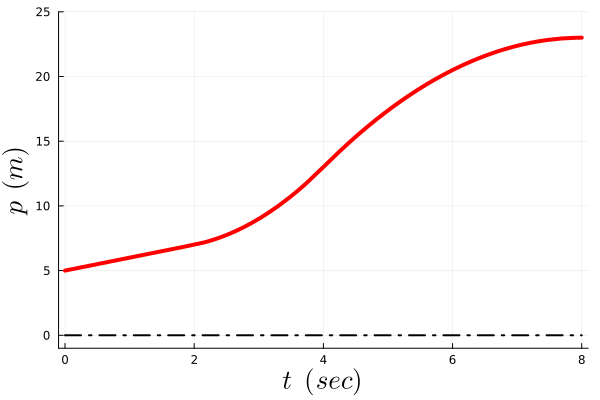

In [3]:
# Set an initial position
p0 = 5.0

# Define the integral as a function so that we can plot it
int(t) = p0 + integral_t(v, 0, t)

p1 = plot(int, 0, 8, linewidth = 4, color = :red, label = false, 
    xlabel = L"$t ~~ ({\rm sec})$", ylabel = L"$p ~~(m)$",
    yguidefontsize = 18, xguidefontsize = 18)

g(t) = 0.0
plot!(g, 0, 8, linewidth = 2, color = :black, label = false, linestyle = :dashdot)

xlims!(p1, (-0.1, 8.1))
ylims!(p1, (-1, 25))

display(p1)


In [8]:
if true # Good path
    P0 = [0.5; 3.5]
    P1 = [0.5; 2.0]
    P2 = [1.0; 2.0]
    P3 = [3.0; 3.7]
    P4 = [3.5; 0.5]
    GraphicFileName = "IntegratedVelocityProfileR2"
    VelocityProfileName = "VelocityProfileR2"
    IntegratedVelocityProfileFileName = "IntegratedVelocityProfileR2Solutions"
else    # Bad Path
    P0 = [0.5; 3.5]
    P1 = [0.5; 2.0]
    P2 = [1.0; 2.0]
    P3 = [3.0; 5]
    P4 = [3.5; 0.5]
    GraphicFileName = "IntegratedVelocityProfileR2_WrongPath"
    VelocityProfileName = "VelocityProfileR22_WrongPath"
    IntegratedVelocityProfileFileName = "IntegratedVelocityProfileR2Solutions_WrongPath"
end

P = [P0 P1 P2 P3 P4]
display(P)
t0 = 0
tf = 3

beta = [0.00807179  -1.97588
        0.677259     2.01576
        0.437326     0.645312
        -0.197531    -0.592593]

# s(t) = (t - t0) / (tf - t0)

# function Bez(s, m, i)
#     return  binomial(m,i) * s^i * (1 - s)^(m - i)
# end

# function p(s, Pcoeff = P)
#     m = size(Pcoeff, 2) - 1
#     pos = Bez(s, m, 0) * Pcoeff[:, 0 + 1]
#     for k = 1:m
#         pos = pos + Bez(s, m, k) * Pcoeff[:, k + 1]
#     end    
#     return pos
# end

# function v(s, Pcoeff = P)
#     m = size(Pcoeff, 2) - 1
#     vel = Bez(s, m - 1, 0) * (m) * (Pcoeff[:, 2] - Pcoeff[:, 1])
#     for k = 1:m - 1
#         vel = vel + Bez(s, m - 1, k) * (m) * (Pcoeff[:, k + 2] - Pcoeff[:, k + 1])
#     end    
#     return vel
# end

# N = 1000
# t = range(0, 3, length = N)

# tau = s.(t)
# pos = zeros(2, N)
# vel = zeros(2, N)

# for k = 1:N
#     pos[:, k] = p(tau[k])
#     vel[:, k] = v(tau[k])
# end

# ob1(x) = 1 + x / 2
# ob2(x) = 0.0 + x / 2

# x = range(1, 2.5, length = N)
# p1 = plot(x, ob1.(x), fillrange = ob2.(x), fillalpha = 0.6, fillcolor = :red, label = false)
# ob1(x) = 4 - x / 2
# ob2(x) = 3.6 - x / 2
# x = range(2.5, 3.0, length = N)
# p1 = plot!(x, ob1.(x), fillrange = ob2.(x), fillalpha = 0.6, fillcolor = :red, label = false)
# plot!(pos[1, :], pos[2, :], legend = false, linewidth = 2, color = :blue, label = false, 
#     aspect_ratio = 1, xlabel = L"$x$", ylabel = L"$y$",
#     yguidefontsize = 18, xguidefontsize = 18)
# annotate!(pos[1, 1], pos[2, 1], text("O", :red, :center, 10))
# annotate!(pos[1, 1] + 0.5, pos[2, 1], text("Point A", :red, :center, 10))
# annotate!(pos[1, end], pos[2, end], text("X", :black, :center, 10))
# annotate!(pos[1, end] + 0.5, pos[2, end], text("Point B", :black, :center, 10))

# xlims!(p1, (-0.1, 4.5))
# ylims!(p1, (-0.1, 4))

# display(p1)


2×5 Matrix{Float64}:
 0.5  0.5  1.0  3.0  3.5
 3.5  2.0  2.0  3.7  0.5

4×2 Matrix{Float64}:
  0.00807179  -1.97588
  0.677259     2.01576
  0.437326     0.645312
 -0.197531    -0.592593

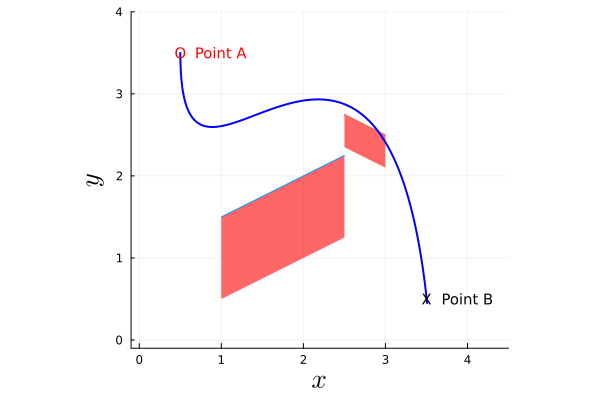

P0 = [0.5, 3.5]
P4 = [3.5, 0.5]
beta = [0.00807179 -1.97588; 0.677259 2.01576; 0.437326 0.645312; -0.197531 -0.592593]


In [ ]:
# Show the parameters being used
@show P0
@show P4
@show beta

# Define the proposed velocity profiles for x and y directions
Velx(t) = beta[1,1] + t*beta[2,1] + t^2*beta[3,1] + t^3*beta[4,1] 
Vely(t) = beta[1,2] + t*beta[2,2] + t^2*beta[3,2] + t^3*beta[4,2] 

# Set an initial position
px0 = P0[1]
py0 = P0[2]

# Define the integral functions for x and y positions so that we can plot them
intx(t) = px0 + integral_t(Velx, 0, t)
inty(t) = py0 + integral_t(Vely, 0, t)

# Use integration to compute the Robot's Path in the Plane
N = 1000
t = range(0, 3, length=N)
posRobotx = intx.(t)
posRoboty = inty.(t)

# Plot the Obstacles
ob1(x) = 1 + x/2
ob2(x) = 0.0 + x/2
x = range(1, 2.5, length=N)
p1 = plot(x, ob1.(x), fillrange=ob2.(x), fillalpha=0.6, fillcolor=:red, label=false)

ob1(x) = 4 - x/2
ob2(x) = 3.6 - x/2
x = range(2.5, 3.0, length=N)
p1 = plot!(x, ob1.(x), fillrange=ob2.(x), fillalpha=0.6, fillcolor=:red, label=false)

# Plot the Robot's path in the Plane with Obstacles
plot!(posRobotx, posRoboty, legend=false, linewidth=2, color=:blue, label=false, 
    aspect_ratio=1, xlabel=L"$x$", ylabel=L"$y$",
    yguidefontsize=18, xguidefontsize=18)
annotate!(P0[1], P0[2], text("O", :red, :center, 10))
annotate!(P0[1] + 0.5, P0[2], text("Point A", :red, :center, 10))
annotate!(P4[1], P4[2], text("X", :black, :center, 10))
annotate!(P4[1] + 0.5, P4[2], text("Point B", :black, :center, 10))

xlims!(p1, (-0.1, 4.5))
ylims!(p1, (-0.1, 4))

display(p1)
